<a href="https://colab.research.google.com/github/czhurdlespeed/TFDevCert/blob/main/TFCert_Practice/03_introduction_to_computer_vision_with_TF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to CNN and Computer Vision with TensorFlow

## Get the data

The images we're working with are from [Kaggle Food101 dataset](https://www.kaggle.com/datasets/dansbecker/food-101)

We have modified the dataset to use only pizza and steak

In [1]:
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2023-12-29 18:13:11--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.99.207, 173.194.202.207, 74.125.199.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.99.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   123MB/s    in 0.8s    

2023-12-29 18:13:12 (123 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



## Inspect the data

Visualizing many samples of data

In [2]:
!ls pizza_steak

test  train


In [3]:
!ls pizza_steak/train/steak

1000205.jpg  1598345.jpg  2062248.jpg  2548974.jpg  3030578.jpg  3571963.jpg  510757.jpg
100135.jpg   1598885.jpg  2081995.jpg  2549316.jpg  3047807.jpg  3576078.jpg  513129.jpg
101312.jpg   1600179.jpg  2087958.jpg  2561199.jpg  3059843.jpg  3577618.jpg  513842.jpg
1021458.jpg  1600794.jpg  2088030.jpg  2563233.jpg  3074367.jpg  3577732.jpg  523535.jpg
1032846.jpg  160552.jpg   2088195.jpg  256592.jpg   3082120.jpg  3578934.jpg  525041.jpg
10380.jpg    1606596.jpg  2090493.jpg  2568848.jpg  3094354.jpg  358042.jpg   534560.jpg
1049459.jpg  1615395.jpg  2090504.jpg  2573392.jpg  3095301.jpg  358045.jpg   534633.jpg
1053665.jpg  1618011.jpg  2125877.jpg  2592401.jpg  3099645.jpg  3591821.jpg  536535.jpg
1068516.jpg  1619357.jpg  2129685.jpg  2599817.jpg  3100476.jpg  359330.jpg   541410.jpg
1068975.jpg  1621763.jpg  2133717.jpg  2603058.jpg  3110387.jpg  3601483.jpg  543691.jpg
1081258.jpg  1623325.jpg  2136662.jpg  2606444.jpg  3113772.jpg  3606642.jpg  560503.jpg
1090122.jpg  1624450.

In [4]:
import os

# Walk through pizza_steak directory and count number of files
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.
There are 2 directories and 0 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.


In [5]:
# Another way to find out how many images in a file

num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))
num_steak_images_train

750

To visualize our images, first get the class names programmatically

In [6]:
# Get the classnames programmatically
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")])) # Created a list of class_names from the subdirectory
print(class_names)

['pizza' 'steak']


In [7]:
# Let's visualize our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Set up target directory
  target_folder = target_dir + "/" + target_class
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in image and plot
  image = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(image)
  plt.title(target_class)
  plt.axis("off")

  print(f"Image shape: {image.shape}") # show the shape of the image
  return image


Image shape: (512, 512, 3)


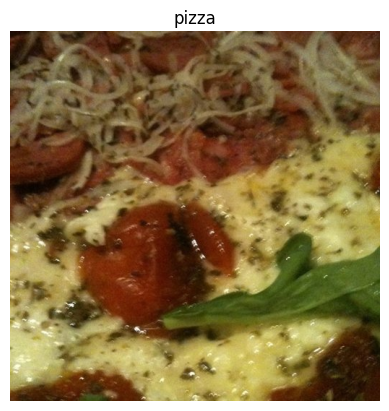

In [8]:
img = view_random_image("pizza_steak/train", "pizza")

In [9]:
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[26,  7,  3],
        [26,  7,  3],
        [26,  7,  3],
        ...,
        [72, 33, 18],
        [77, 38, 23],
        [73, 34, 19]],

       [[30, 11,  7],
        [29, 10,  6],
        [29, 10,  6],
        ...,
        [68, 29, 14],
        [69, 30, 15],
        [74, 35, 20]],

       [[31, 13,  9],
        [30, 12,  8],
        [30, 13,  6],
        ...,
        [71, 34, 18],
        [67, 29, 16],
        [73, 35, 22]],

       ...,

       [[81, 41, 15],
        [89, 50, 21],
        [97, 58, 29],
        ...,
        [55, 24,  4],
        [54, 23,  3],
        [55, 24,  4]],

       [[80, 43, 17],
        [87, 50, 23],
        [92, 55, 26],
        ...,
        [54, 23,  3],
        [54, 23,  3],
        [56, 25,  5]],

       [[89, 53, 27],
        [90, 55, 27],
        [89, 52, 25],
        ...,
        [55, 24,  4],
        [58, 27,  7],
        [62, 31, 11]]], dtype=uint8)>

In [10]:
# View shape
img.shape # width, heigh, color channels

(512, 512, 3)

In [11]:
# Get all the pixel values between 0 & 1
img/255.

array([[[0.10196078, 0.02745098, 0.01176471],
        [0.10196078, 0.02745098, 0.01176471],
        [0.10196078, 0.02745098, 0.01176471],
        ...,
        [0.28235294, 0.12941176, 0.07058824],
        [0.30196078, 0.14901961, 0.09019608],
        [0.28627451, 0.13333333, 0.0745098 ]],

       [[0.11764706, 0.04313725, 0.02745098],
        [0.11372549, 0.03921569, 0.02352941],
        [0.11372549, 0.03921569, 0.02352941],
        ...,
        [0.26666667, 0.11372549, 0.05490196],
        [0.27058824, 0.11764706, 0.05882353],
        [0.29019608, 0.1372549 , 0.07843137]],

       [[0.12156863, 0.05098039, 0.03529412],
        [0.11764706, 0.04705882, 0.03137255],
        [0.11764706, 0.05098039, 0.02352941],
        ...,
        [0.27843137, 0.13333333, 0.07058824],
        [0.2627451 , 0.11372549, 0.0627451 ],
        [0.28627451, 0.1372549 , 0.08627451]],

       ...,

       [[0.31764706, 0.16078431, 0.05882353],
        [0.34901961, 0.19607843, 0.08235294],
        [0.38039216, 0

## An end-to-end example

Let's build a convolutional neural network to find patterns in our images, more specifically we need way to:
* Load our images
* Preprocess our images
* Build a  CNN to find patterns in our images
* Compile our CNN
* Fit the CNN to our training data

In [12]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# set the seed
tf.random.set_seed(42)

train_datagen = ImageDataGenerator(rescale = 1./255)
valid_datagen = ImageDataGenerator(rescale = 1./255)

# Set up paths to our data directories
train_dir = "/content/pizza_steak/train"
test_dir = "pizza_steak/test"

# Import data from directories and turn into batches
train_data = train_datagen.flow_from_directory(directory = train_dir, batch_size= 32,
                                               target_size=(224,224), class_mode = "binary",
                                               seed = 42)
valid_data = valid_datagen.flow_from_directory(directory = test_dir, batch_size=32,
                                               target_size = (224,224),class_mode = "binary",
                                               seed = 42)

model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters =10, kernel_size = 3, activation = "relu", input_shape = (224,224,3)),
    tf.keras.layers.Conv2D(10,3, activation = "relu"),
    tf.keras.layers.MaxPool2D(pool_size = 2, padding = "valid"),
    tf.keras.layers.Conv2D(10,3, activation = "relu"),
    tf.keras.layers.Conv2D(10,3, activation = "relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation = "sigmoid")
])

model_1.compile(loss= "binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

history_1 = model_1.fit(train_data, epochs = 5, steps_per_epoch = len(train_data),
                        validation_data = valid_data, validation_steps = len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 20s 169ms/step - loss: 0.5950 - accuracy: 0.6933 - val_loss: 0.4518 - val_accuracy: 0.7940
Epoch 2/5
47/47 [==============================] - 5s 113ms/step - loss: 0.4686 - accuracy: 0.7840 - val_loss: 0.3943 - val_accuracy: 0.8280
Epoch 3/5
47/47 [==============================] - 7s 138ms/step - loss: 0.4397 - accuracy: 0.8027 - val_loss: 0.3683 - val_accuracy: 0.8520
Epoch 4/5
47/47 [==============================] - 5s 114ms/step - loss: 0.3997 - accuracy: 0.8273 - val_loss: 0.3300 - val_accuracy: 0.8640
Epoch 5/5
47/47 [==============================] - 7s 141ms/step - loss: 0.3720 - accuracy: 0.8480 - val_loss: 0.3118 - val_accuracy: 0.8740


> **Note:** If the cell is taking a long time to run, switch runtime to use GPU!

In [13]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2  (None, 110, 110, 10)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 53, 53, 10)        0         
 g2D)                                                   

## Using the same model as before
Let's replicate a model we've built in a previous section to see if it work with our image data

In [14]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(1, activation = "sigmoid")
])

model_2.compile(loss= "binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

history_2 = model_2.fit(train_data, epochs=5, steps_per_epoch = len(train_data),
                        validation_data = valid_data, validation_steps = len(valid_data))

Epoch 1/5
47/47 [==============================] - 6s 107ms/step - loss: 0.7704 - accuracy: 0.5087 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 5s 106ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 6s 123ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 6s 126ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 8s 163ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000


> Peformance isn't good. Practically guessing. Stick with a CNN!!

In [15]:
# Dense model has a lot more parameters
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 4)                 602116    
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602141 (2.30 MB)
Trainable params: 602141 (2.30 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [16]:
# Let's try to improve model 2
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (224,224,3)),
    tf.keras.layers.Dense(100, activation = "relu"),
    tf.keras.layers.Dense(100, activation = "relu"),
    tf.keras.layers.Dense(100, activation = "relu"),
    tf.keras.layers.Dense(1, activation = "sigmoid")
])

model_3.compile(loss= "binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])
history_3 = model_3.fit(train_data,
                        epochs = 5,
                        steps_per_epoch = len(train_data),
                        validation_data = valid_data,
                        validation_steps = len(valid_data))

Epoch 1/5
47/47 [==============================] - 8s 142ms/step - loss: 1.9489 - accuracy: 0.6240 - val_loss: 0.4771 - val_accuracy: 0.7720
Epoch 2/5
47/47 [==============================] - 5s 109ms/step - loss: 0.8361 - accuracy: 0.7087 - val_loss: 0.6440 - val_accuracy: 0.7140
Epoch 3/5
47/47 [==============================] - 6s 135ms/step - loss: 0.7750 - accuracy: 0.7133 - val_loss: 0.7358 - val_accuracy: 0.7060
Epoch 4/5
47/47 [==============================] - 6s 121ms/step - loss: 0.4989 - accuracy: 0.7767 - val_loss: 0.5588 - val_accuracy: 0.7120
Epoch 5/5
47/47 [==============================] - 5s 114ms/step - loss: 0.4188 - accuracy: 0.8147 - val_loss: 0.4734 - val_accuracy: 0.7640


In [17]:
# Better than model 2 but still not better than the CNN model
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_4 (Dense)             (None, 100)               15052900  
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15073201 (57.50 MB)
Trainable params: 15073201 (57.50 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Binary Classification: Let's break it down
1. Visualize Data
2. Preprocess the data
3. Create a model
4. Fit the model
5. Evaluate the model
6. Adjust parameters
7. Repeat until satisfied

### 1. Visualize Data

Image shape: (512, 512, 3)
Image shape: (512, 512, 3)


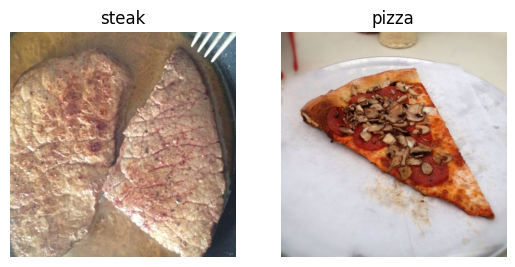

In [20]:
# visualize the data
plt.figure()
plt.subplot(1,2,1)
steak_img = view_random_image("pizza_steak/train/", "steak")
plt.subplot(1,2,2)
pizza_img = view_random_image("pizza_steak/train/","pizza")

### 2. Preprocess the data

In [21]:
# Train and Test sets already split from download
# Define directory dataset paths
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

**Turn our data into batches**
* all images might not fit into memory; split into batches

In [22]:
# Create train and test data generators and rescale the data e.g. loading data into memory
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# automatically turns images into TF tensors
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)


In [23]:
# need way to load in our image data from directories and turn into batches
train_data = train_datagen.flow_from_directory(directory=train_dir, # target directory
                                               target_size=(224, 224),
                                               class_mode='binary',
                                               batch_size=32)
test_data = test_datagen.flow_from_directory(directory=test_dir, # target directory
                                             target_size=(224, 224), # height x width
                                             class_mode='binary', # binary classification (binary data)
                                             batch_size=32) # size of mini-batches

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [25]:
# Get a sample of a train data batch
images, labels = train_data.next()
len(images), len(labels)

(32, 32)

In [26]:
# How many batches are there
len(train_data)

47

In [27]:
1500/32

46.875

In [29]:
# Get the first two images
images[0], images[0].shape

(array([[[0.47058827, 0.40784317, 0.34509805],
         [0.48627454, 0.42352945, 0.36078432],
         [0.48627454, 0.43529415, 0.37254903],
         ...,
         [0.82745105, 0.7137255 , 0.48627454],
         [0.8431373 , 0.7372549 , 0.5294118 ],
         [0.87843144, 0.77647066, 0.58431375]],
 
        [[0.50980395, 0.427451  , 0.36078432],
         [0.5058824 , 0.42352945, 0.35686275],
         [0.5137255 , 0.4431373 , 0.3647059 ],
         ...,
         [0.82745105, 0.7058824 , 0.48235297],
         [0.82745105, 0.70980394, 0.49803925],
         [0.8431373 , 0.73333335, 0.5372549 ]],
 
        [[0.5254902 , 0.427451  , 0.34901962],
         [0.5372549 , 0.43921572, 0.36078432],
         [0.5372549 , 0.45098042, 0.36078432],
         ...,
         [0.82745105, 0.7019608 , 0.4784314 ],
         [0.82745105, 0.7058824 , 0.4901961 ],
         [0.8352942 , 0.7176471 , 0.5137255 ]],
 
        ...,
 
        [[0.77647066, 0.5647059 , 0.2901961 ],
         [0.77647066, 0.53333336, 0.23137

Note that images have been scaled (normalized) and their shape is (224, 224, 3)

In [30]:
labels

array([1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1.,
       1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1.],
      dtype=float32)

### 3. Create a CNN model (start with a baseline)

In [31]:
# Make the creating of our model a little easier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [40]:
# Baseline model = start here and then begin modifying to improve
model_4 = Sequential([
    Conv2D(filters=10, kernel_size=3, strides=1, padding='valid',
           activation='relu',input_shape=(224,224,3)), # input layer specify shape
    Conv2D(10,3,activation='relu'),
    Conv2D(10,3,activation='relu'),
    Flatten(),
    Dense(1, activation="sigmoid") # output layer; binary classification => sigmoid
])

In [41]:
model_4.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=['accuracy'])

### 4. Fit the model

In [34]:
# Summary of model
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_3 (Flatten)         (None, 475240)            0         
                                                                 
 dense_8 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477341 (1.82 MB)
Trainable params: 477341 (1.82 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [35]:
# Check the lengths of training and test generators
len(train_data), len(test_data) # number of batches

(47, 16)

In [42]:
# Fit the model
history_4 = model_4.fit(train_data, # train_data is combination of image tensors and labels
            epochs=5,
            steps_per_epoch=len(train_data),
            validation_data=test_data,
            validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 7s 117ms/step - loss: 1.7429 - accuracy: 0.5913 - val_loss: 0.5782 - val_accuracy: 0.6860
Epoch 2/5
47/47 [==============================] - 6s 117ms/step - loss: 0.4863 - accuracy: 0.7760 - val_loss: 0.3653 - val_accuracy: 0.8400
Epoch 3/5
47/47 [==============================] - 7s 147ms/step - loss: 0.4007 - accuracy: 0.8193 - val_loss: 0.3766 - val_accuracy: 0.8400
Epoch 4/5
47/47 [==============================] - 10s 210ms/step - loss: 0.2984 - accuracy: 0.8793 - val_loss: 0.3500 - val_accuracy: 0.8540
Epoch 5/5
47/47 [==============================] - 11s 243ms/step - loss: 0.1890 - accuracy: 0.9453 - val_loss: 0.4041 - val_accuracy: 0.8380


In [37]:
model_1.evaluate(test_data)

16/16 [==============================] - 2s 99ms/step - loss: 0.3118 - accuracy: 0.8740


[0.31184256076812744, 0.8740000128746033]

In [38]:
model_1.summary() # model_1 is still better; let's modify model_4

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2  (None, 110, 110, 10)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 53, 53, 10)        0         
 g2D)                                                   

### 5. Evaulating our model

<Axes: >

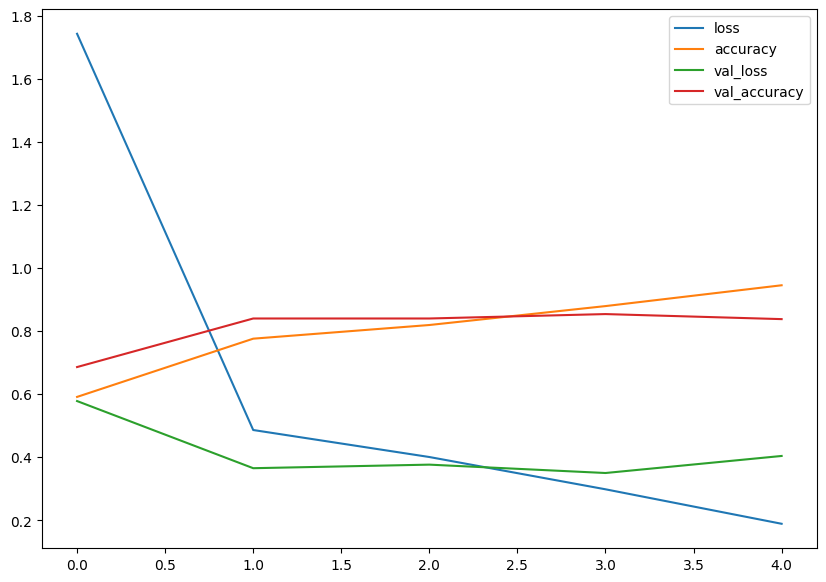

In [43]:
# Plot the lost curves
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10,7))

In [46]:
# Plot the validation and training curves separately
def plot_loss_curve(history):
  """
  Returns separate loss curves for training and validation sets
  """
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]
  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"]))
  plt.plot(epochs, loss, label="Training Loss")
  plt.plot(epochs, val_loss, label="Val Loss")
  plt.title("Loss")
  plt.xlabel("epochs")
  plt.legend()

  plt.figure()
  plt.plot(epochs, accuracy, label="Training Accuracy")
  plt.plot(epochs, val_accuracy, label="Val Accuracy")
  plt.title("Accuracy")
  plt.xlabel("epochs")
  plt.legend()

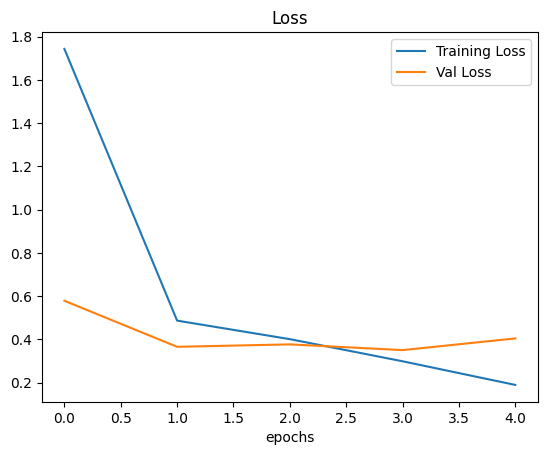

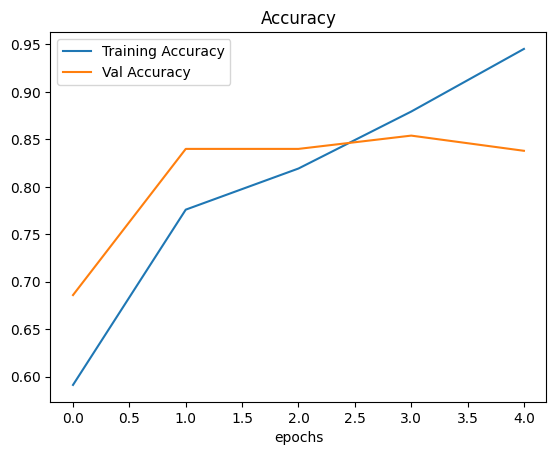

In [48]:
plot_loss_curve(history_4) # appears that overfitting is occuring

### 6. Adjust the model parameters

Reduce overfitting:
* Add data augmentation
* Add regularization layers (MaxPool2D)
* Add more data...

In [49]:
# Create the model (new baseline)
model_5 = Sequential([
    Conv2D(10,3, activation='relu', input_shape=(224, 224, 3)),
    MaxPool2D(pool_size=2), # max of each 2x2 square in input; cuts height and width by 1/2
    Conv2D(10,3, activation='relu'),
    MaxPool2D(pool_size=2), # finds "most important" features of each 2x2 square
    Conv2D(10,3,activation='relu'),
    MaxPool2D(pool_size=2),
    Flatten(),
    Dense(1, activation='sigmoid')
])

In [51]:
model_5.compile(loss = "binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [52]:
history_5 = model_5.fit(train_data, epochs = 5, steps_per_epoch=len(train_data),
                        validation_data = test_data, validation_steps = len(test_data))

Epoch 1/5
47/47 [==============================] - 12s 202ms/step - loss: 0.6536 - accuracy: 0.6027 - val_loss: 0.5167 - val_accuracy: 0.7760
Epoch 2/5
47/47 [==============================] - 5s 110ms/step - loss: 0.4647 - accuracy: 0.7860 - val_loss: 0.3677 - val_accuracy: 0.8560
Epoch 3/5
47/47 [==============================] - 5s 109ms/step - loss: 0.4401 - accuracy: 0.7960 - val_loss: 0.3778 - val_accuracy: 0.8500
Epoch 4/5
47/47 [==============================] - 7s 143ms/step - loss: 0.4028 - accuracy: 0.8193 - val_loss: 0.3377 - val_accuracy: 0.8580
Epoch 5/5
47/47 [==============================] - 5s 109ms/step - loss: 0.3687 - accuracy: 0.8440 - val_loss: 0.3277 - val_accuracy: 0.8720


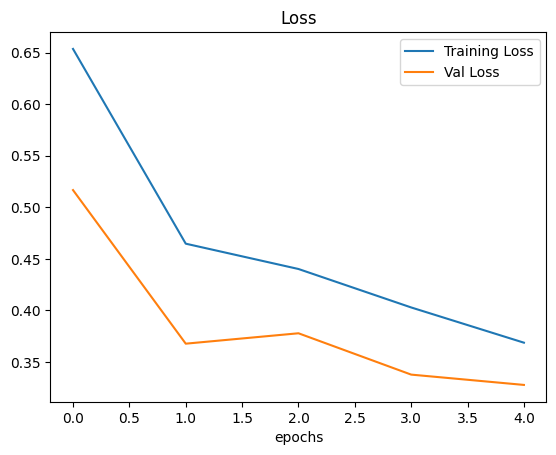

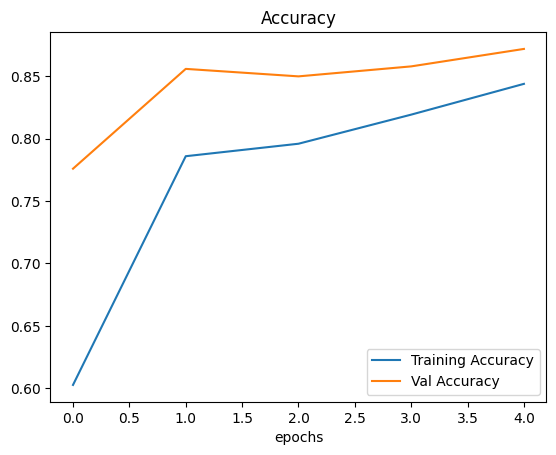

In [54]:
plot_loss_curve(history_5) # overfitting reduced!!; val loss trends with training loss == good

In [56]:
model_5.summary() # less parameters than model_4 but far more accurate / less overfitting

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 111, 111, 10)      0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 54, 54, 10)        0         
 g2D)                                                            
                                                                 
 conv2d_12 (Conv2D)          (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 26, 26, 10)       

In [57]:
model_4.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_8 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_9 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_4 (Flatten)         (None, 475240)            0         
                                                                 
 dense_9 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477341 (1.82 MB)
Trainable params: 477341 (1.82 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
